In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

figuredir = '../../figures'
if not os.path.exists(figuredir):
    os.mkdir(figuredir)

In [2]:
tmpdir = '../../data/tmp'
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    
hladir = os.path.join(tmpdir, 'HLA')
if not os.path.exists(hladir):
    os.mkdir(hladir)

In [3]:
! ls ../../data/tmp/

1KG  funcchar  GWAS  HLA  LARGE  misc  plink


## Process popgen data to prepare variant set for imputation

In [4]:
chr6dat = 'gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/OmniH3Merged_PrePost2016_20220113.INFO_8e-1.Deduped.chr6.*'
popgendir = '../../data/tmp/HLA/popgen/'
if not os.path.exists(popgendir):
    os.mkdir(popgendir)

In [5]:
cmd = 'gsutil -m cp {chrdat} {outdir}'.format(chrdat=chr6dat, outdir=popgendir)
!{cmd}

Copying gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/OmniH3Merged_PrePost2016_20220113.INFO_8e-1.Deduped.chr6.log...
Copying gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/OmniH3Merged_PrePost2016_20220113.INFO_8e-1.Deduped.chr6.pgen...
Copying gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/OmniH3Merged_PrePost2016_20220113.INFO_8e-1.Deduped.chr6.psam...
Copying gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/OmniH3Merged_PrePost2016_20220113.INFO_8e-1.Deduped.chr6.pvar...
/ [4/4 files][  1.3 GiB/  1.3 GiB] 100% Done  76.6 MiB/s ETA 00:00:00           
Operation completed over 4 objects/1.3 GiB.                                      


In [6]:
cmd

'gsutil -m cp gs://popgen-gwas/data/genotype/merge/Imputed_Plink2/OmniH3Merged_PrePost2016_20220113.INFO_8e-1.Deduped.chr6.* ../../data/tmp/HLA/popgen/'

In [5]:
b = '../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6'

In [6]:
buffer = 1500000
start = 29691116
fin = 33054976
start_buff = start-buffer
fin_buff = fin+buffer

In [8]:
cmd = 'plink2 --pfile {b} --make-pgen --keep-allele-order --out {b}.{fromv}-{to} --mac 1 --from-bp {fromv} --to-bp {to} --chr 6 --set-all-var-ids @:#[b37]\$r,\$a --new-id-max-allele-len 280'.format(b=b, fromv=start_buff, to=fin_buff)
print(cmd)
!{cmd}

plink2 --pfile ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6 --make-pgen --keep-allele-order --out ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976 --mac 1 --from-bp 28191116 --to-bp 34554976 --chr 6 --set-all-var-ids @:#[b37]\$r,\$a --new-id-max-allele-len 280
PLINK v2.00a3LM 64-bit Intel (1 Jul 2021)      www.cog-genomics.org/plink/2.0/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976.log.
Options in effect:
  --chr 6
  --from-bp 28191116
  --keep-allele-order
  --mac 1
  --make-pgen
  --new-id-max-allele-len 280
  --out ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976
  --pfile ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6
  --set-all-var-ids @:#[b37]$r,$a
  --to-bp 34

In [7]:
b = '{b}.{fromv}-{to}'.format(b=b, fromv=start_buff, to=fin_buff)
print(b)

../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976


In [10]:
cmd = 'plink2 --pfile {b} --make-bed --keep-allele-order --out {b}'.format(b=b)
print(cmd)
!{cmd}

plink2 --pfile ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976 --make-bed --keep-allele-order --out ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976
PLINK v2.00a3LM 64-bit Intel (1 Jul 2021)      www.cog-genomics.org/plink/2.0/
(C) 2005-2021 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976.log.
Options in effect:
  --keep-allele-order
  --make-bed
  --out ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976
  --pfile ../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976

Start time: Sat Feb  5 23:11:24 2022
Note: --keep-allele-order no longer has any effect.
64422 MiB RAM detected; reserving 32211 MiB for main workspace.
Using up to 16 threads (change this with --

In [10]:
genotyped_pvar = pd.read_csv(b+'.pvar', sep='\t', skiprows=16)
genotyped_pvar.head()

,#CHROM,POS,ID,REF,ALT,FILTER,INFO
0,6,28191288,"6:28191288[b37]G,T",G,T,PASS,RefPanelAF=0.0103914;AN=11110;AC=30;INFO=0.990976
1,6,28191336,"6:28191336[b37]C,T",C,T,PASS,RefPanelAF=0.0646691;AN=11110;AC=856;INFO=0.99...
2,6,28191613,"6:28191613[b37]G,T",G,T,PASS,RefPanelAF=0.00272397;AN=11110;AC=62;INFO=0.96...
3,6,28191718,"6:28191718[b37]T,C",T,C,PASS,RefPanelAF=0.0336965;AN=11110;AC=777;INFO=0.99...
4,6,28191859,"6:28191859[b37]T,C",T,C,PASS,RefPanelAF=0.0133172;AN=11110;AC=71;INFO=0.97087


In [11]:
genotyped_variants_fn = '../../data/tmp/HLA/Stanford/genotyped_variants.txt'
with open(genotyped_variants_fn, 'w') as F:
    F.write('\n'.join(list(genotyped_pvar['ID'])))

## Merge affy and omni arrays

In [8]:
a_affy = '../../data/tmp/HLA/Stanford/Affy6_AGRPanel.vcf.gz'
a_omni = '../../data/tmp/HLA/Stanford/Omni25AFRPanel.vcf.gz'
out_affy = a_affy.replace('.vcf.gz', '')


In [ ]:
cmd = 'plink2 --vcf {a} --out {out} --require-no-info MULTI_ALLELIC --make-bed --keep-allele-order --chr 6 --set-all-var-ids @:#[b37]\$r,\$a --new-id-max-allele-len 280 --from-bp {fromv} --to-bp {to}'.format(a=a_affy, out=out_affy, fromv=start_buff, to=fin_buff)
print(cmd)
!{cmd}

In [9]:
a_affy = out_affy
out_omni = a_omni.replace('.vcf.gz', '')


In [ ]:
cmd = 'plink2 --vcf {a} --out {out} --require-no-info MULTI_ALLELIC --make-bed --keep-allele-order --chr 6 --set-all-var-ids @:#[b37]\$r,\$a --new-id-max-allele-len 280 --from-bp {fromv} --to-bp {to}'.format(a=a_omni, out=out_omni, fromv=start_buff, to=fin_buff)
print(cmd)
!{cmd}

In [10]:
a_omni = out_omni

In [12]:
merged = '../../data/tmp/HLA/Stanford/Omni25AffyMerged.AGR.chr6_{fromv}_{to}'.format(fromv=start_buff, to=fin_buff)


In [ ]:
cmd = 'plink --bfile {batch1} --bmerge {batch2} --out {merged} --keep-allele-order'.format(batch1=a_omni, batch2=a_affy, merged=merged)
print(cmd)
!{cmd}


In [ ]:
a = merged
a

In [29]:
fam = pd.read_csv(a+'.fam', sep='\t', header=None)
fam.head()

,0,1,2,3,4,5
0,0,09C81137_09C81137,0,0,0,-9
1,0,09C81823_09C81823,0,0,0,-9
2,0,09C82443_09C82443,0,0,0,-9
3,0,09C82628_09C82628,0,0,0,-9
4,0,09C85658_09C85658,0,0,0,-9


In [30]:
affy_hla = pd.read_csv('../../data/tmp/HLA/Stanford/Affy6_AGRPanel.Genotyped.HLAs.tsv', sep='\t', index_col=0)
omni_hla = pd.read_csv('../../data/tmp/HLA/Stanford/Omni25AFRPanel.Genotyped.HLAs.tsv', sep='\t', index_col=0)
merged_hla = pd.concat([omni_hla, affy_hla], axis=0)

In [31]:
pd.Series(merged_hla.index).isin(fam[1]).value_counts()

True    3608
dtype: int64

In [32]:
merged_hla = merged_hla.loc[fam[1], :]

In [24]:
numnull = merged_hla.isnull().sum(axis=1)
numnull.value_counts()

0     2541
16     595
1      300
2      110
4       34
3       11
6        7
8        6
5        2
12       1
10       1
dtype: int64

In [ ]:
tofilt = fam.loc[fam[1].isin(numnull.index[numnull==16]),:]
filtfn = '{a}.NoHLAToFilt.tsv'.format(a=a)
print(filtfn)
tofilt.to_csv(filtfn, sep='\t', index=False, header=False)

In [ ]:
cmd = 'plink --bfile {a} --make-bed --keep-allele-order --remove {remove} --extract {extract} --out {a}.HasHLA.Genotyped --mac 1'.format(a=a, remove=filtfn, extract=genotyped_variants_fn)
print(cmd)
!{cmd}

In [ ]:
a = '{a}.HasHLA.Genotyped'.format(a=a)
print(a)
fam = pd.read_csv(a+'.fam', sep='\s+', header=None)


In [40]:
fam.head()

,0,1,2,3,4,5
0,0,09C81137_09C81137,0,0,0,-9
1,0,09C82443_09C82443,0,0,0,-9
2,0,09C85658_09C85658,0,0,0,-9
3,0,09C86406_09C86406,0,0,0,-9
4,0,09C89080_09C89080,0,0,0,-9


In [41]:
merged_hla_filt = merged_hla.loc[fam[1], :]

In [42]:
merged_hla_filt.isnull().sum(axis=1).value_counts()

0     2541
1      300
2      110
4       34
3       11
6        7
8        6
5        2
12       1
10       1
dtype: int64

In [ ]:
hlafn = a+'.HLAs.tsv'
print(hlafn)
merged_hla_filt.to_csv(hlafn, sep='\t')

In [49]:
merged_hla_filt_2dig = merged_hla_filt.applymap(lambda x: str(x).split(':')[0]).replace('nan', np.nan)
merged_hla_filt_2dig.head()

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
09C81137_09C81137,01,02,08,07,07,07,03,15,02,06,05,01,04,01,01,02
09C82443_09C82443,68,23,42,15,06,02,11,11,03,03,05,05,01,105,01,02
09C85658_09C85658,NaN,02,15,53,02,04,15,03,06,02,01,05,17,04,02,01
09C86406_09C86406,68,30,44,81,07,08,13,15,06,06,01,01,01,04,02,01
09C89080_09C89080,30,23,42,15,17,02,03,07,04,02,04,02,01,11,02,02


In [ ]:
hlafn_2dig = a+'.HLAs.2dig.tsv'
print(hlafn)
merged_hla_filt_2dig.to_csv(hlafn_2dig, sep='\t')

In [ ]:
! gsutil -m cp ../../data/tmp/HLA/Blacks/Omni25AffyMerged* gs://popgen-gwas/data/analysis/HLA/Blacks/

In [55]:
sampset = 'Stanford_Merged'
base = 'gs://popgen-gwas/data/analysis/HLA/Stanford/Omni25AffyMerged.AGR.chr6_28191116_34554976.HasHLA.Genotyped'
logpath = 'gs://popgen-gwas/data/analysis/HLA/Stanford/HIBAG_Index_Merged/log/{job-name}-{job-id}.log'
nclass=7
flankstr = '500K'
flank=500000
dig = '4dig'
outbase = 'gs://popgen-gwas/data/analysis/HLA/Stanford/HIBAG_Index_Merged/Omni25AffyMerged.{g}.Nclass_{NCLASS}.Flank_{F}.{DIG}.Model.rdata'
hlafn = 'gs://popgen-gwas/data/analysis/HLA/Stanford/Omni25AffyMerged.AGR.chr6_28191116_34554976.HasHLA.Genotyped.HLAs.tsv'
namebase = '20220205.Omni25AffyMerged.{g}.{NCLASS}.{DIG}'

subcmd = 'Rscript --vanilla ${SCRIPT} --bed ${BED} --hlafile ${HLA} --nclassifier ${CLASSIFIERS} --cores ${CORES} --gene ${GENE} --out ${INDEX} --flankbp ${FLANK}'

for g in ['A', 'B', 'C', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1']:
    out = outbase.format(g=g, SAMP=sampset, NCLASS=nclass, DIG=dig, F=flankstr)
    name =namebase.format(g=g, SAMP=sampset, NCLASS=nclass, DIG=dig)
    cmd = """dsub \
    --name {NAME} \
    --provider google-v2 \
    --machine-type e2-highcpu-8 \
    --project sabeti-ebola-gwas \
    --zones us-east1-b \
    --logging {log} \
    --input SCRIPT=gs://popgen-gwas/code/HIBAG_Utils/Prepare_HIBAG_Index.R \
    --input BED={base}.bed \
    --input BIM={base}.bim \
    --input FAM={base}.fam \
    --input HLA={HLA} \
    --env GENE={g} \
    --env CORES=7 \
    --env CLASSIFIERS={NCLASS} \
    --env FLANK={FLANK} \
    --output INDEX={OUT} \
    --timeout 2w \
    --image quay.io/dkotliar/hibag_docker:0.4 \
    --command '{subcmd}'""".format(g=g, log=logpath, base=base, NCLASS=nclass, FLANK=flank, OUT=out, NAME=name, HLA=hlafn, subcmd=subcmd)
    print(cmd)
    !{cmd}

dsub     --name 20220205.Omni25AffyMerged.A.7.4dig     --provider google-v2     --machine-type e2-highcpu-8     --project sabeti-ebola-gwas     --zones us-east1-b     --logging gs://popgen-gwas/data/analysis/HLA/Blacks/HIBAG_Index_Merged/log/{job-name}-{job-id}.log     --input SCRIPT=gs://popgen-gwas/code/HIBAG_Utils/Prepare_HIBAG_Index.R     --input BED=gs://popgen-gwas/data/analysis/HLA/Blacks/Omni25AffyMerged.AGR.chr6_28191116_34554976.HasHLA.Genotyped.bed     --input BIM=gs://popgen-gwas/data/analysis/HLA/Blacks/Omni25AffyMerged.AGR.chr6_28191116_34554976.HasHLA.Genotyped.bim     --input FAM=gs://popgen-gwas/data/analysis/HLA/Blacks/Omni25AffyMerged.AGR.chr6_28191116_34554976.HasHLA.Genotyped.fam     --input HLA=gs://popgen-gwas/data/analysis/HLA/Blacks/Omni25AffyMerged.AGR.chr6_28191116_34554976.HasHLA.Genotyped.HLAs.tsv     --env GENE=A     --env CORES=7     --env CLASSIFIERS=7     --env FLANK=500000     --output INDEX=gs://popgen-gwas/data/analysis/HLA/Blacks/HIBAG_Index_Merged/

In [44]:
! dstat --provider google-v2 --project sabeti-ebola-gwas --jobs '20220205-o--dkotliar--220205-233406-42' --users 'dkotliar' --status '*'


Job Name         Status                          Last Update
---------------  ------------------------------  --------------
20220205-omn...  Started running "user-command"  02-05 23:35:34



## Look at imputation results

In [4]:
if not os.path.exists('../../data/tmp/HLA/Stanford/HIBAG_Index'):
    os.mkdir('../../data/tmp/HLA/Stanford/HIBAG_Index')

In [ ]:
! gsutil -m rsync -r gs://popgen-gwas/data/analysis/HLA/Stanford/HIBAG_Index_Merged ../../data/tmp/HLA/Stanford/HIBAG_Index

## Impute popgen samples

In [5]:
a = '../../data/tmp/HLA/popgen/OmniH3Merged_PrePost2016_20210810.INFO_9e-1.Deduped.chr6.28191116-34554976'

In [6]:
import os
genes = ['A', 'B', 'C', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1', 'DRB1']
#genes = ['B']
outdir = '../../data/tmp/HLA/Stanford/Predictions'
if not os.path.exists(outdir): os.mkdir(outdir)
for g in genes:
    bedfn = '{a}.bed'.format(a=a)
    indexfn = '../../data/tmp/HLA/Stanford/HIBAG_Index/Omni25AffyMerged.{g}.Nclass_7.Flank_500K.4dig.Model.rdata'.format(g=g)
    outfn = os.path.join(outdir, os.path.basename(indexfn)).replace('.rdata', '.20210728.tsv')
    if os.path.exists(indexfn) and not os.path.exists(outfn):
        cmd = 'Rscript ../../code/HIBAG_Utils/PredictHLA_HIBAG_PreformedIndex.R -b {bed} -i {ind} -o {out}'.format(bed=bedfn, ind=indexfn, out=outfn)
        print(cmd)
        !{cmd}

In [ ]:
import os
genes = ['A', 'B', 'C', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1', 'DRB1']
genes = ['DRB1']
outdir = '../../data/tmp/HLA/Stanford/Predictions'
if not os.path.exists(outdir): os.mkdir(outdir)
for g in genes:
    bedfn = '{a}.bed'.format(a=a)
    indexfn = '../../data/tmp/HLA/Stanford/HIBAG_Index/Omni25AffyMerged.{g}.Nclass_7.Flank_500K.4dig.Model.rdata'.format(g=g)
    outfn = os.path.join(outdir, os.path.basename(indexfn)).replace('.rdata', '.20220206.tsv')
    probout = os.path.join(outdir, os.path.basename(indexfn)).replace('.rdata', '.20220206.AllProbabilities.tsv')
    #if os.path.exists(indexfn) and not os.path.exists(outfn):
    if True:
        cmd = 'Rscript ../../code/HIBAG_Utils/PredictHLA_HIBAG_PreformedIndex_allProbs.R -b {bed} -i {ind} -o {out} -p {probout}'.format(bed=bedfn, ind=indexfn, out=outfn, probout=probout)
        print(cmd)
        !{cmd}

In [8]:
import pandas as pd
stdoutfiles = ! ls ../../data/tmp/HLA/Stanford/HIBAG_Index/log/omni25affymerged-*-*stdout.log

oob_accuracy_500K = {}
for f in stdoutfiles:
    gene = f.split('/')[-1].split('-')[1].upper()
    print(gene)
    
    lines = open(f).read().split('\n')
    for l in lines:
        if 'Out-of-bag accuracy:' in l:
            accuracy = float(l.split(': ')[-1].replace('%', ''))
            oob_accuracy_500K[gene] = accuracy / 100
            print(gene, accuracy)
            
oob_accuracy_500K = pd.Series(oob_accuracy_500K)


A
A 95.9
B
B
B 92.6
C
C 96.3
DPA1
DPA1 97.4
DPB1
DPB1 93.4
DQA1
DQA1 95.9
DQB1
DQB1 95.6
DRB1
DRB1 93.5


In [9]:
def reorder_cols_alpha(c1, c2):
    c1new = c1.copy()
    c2new = c2.copy()
    ind = c1>c2
    c1new.loc[ind] = c2.loc[ind]
    c2new.loc[ind] = c1.loc[ind]
    return(c1new, c2new)

sbt = pd.read_csv('gs://popgen-gwas/data/HLA/KGH/HLA/HLAcalls_Identified_Cleaned_4dig_20190822.tsv', sep='\t')
sbt['DPA1_1'] = sbt['DPA1_1'].replace({'03:01@2':'03:01'})
sbt['DPA1_2'] = sbt['DPA1_2'].replace({'03:01@2':'03:01'})
ind = ~sbt['Post_2016_GenotIID'].isnull()
sbt_post = sbt.loc[ind, :].iloc[:, 9:]
sbt_post.index = sbt.loc[ind, 'Post_2016_GenotIID']
ind = ~sbt['Pre_2016_GenotIID'].isnull()
sbt_pre = sbt.loc[ind, :].iloc[:, 9:]
sbt_pre.index = sbt.loc[ind, 'Pre_2016_GenotIID']
genes = ['A', 'B', 'C', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1']
for g in genes:
    outfn = '../../data/tmp/HLA/Stanford/Predictions/Omni25AffyMerged.{g}.Nclass_7.Flank_500K.4dig.Model.20210728.tsv'.format(g=g)
    if not os.path.exists(outfn):
        continue
    prediction = pd.read_csv(outfn, sep='\t')
    prediction.index = prediction['sample.id']
    a1new, a2new = reorder_cols_alpha(sbt_post['%s_1' % g], sbt_post['%s_2' % g])
    sbt_post['SBT_%s_1' % g] = a1new
    sbt_post['SBT_%s_2' % g] = a2new
    a1new, a2new = reorder_cols_alpha(prediction.loc[sbt_post.index, 'allele1'], prediction.loc[sbt_post.index, 'allele2'])
    sbt_post['Predict_%s_1' % g] = a1new
    sbt_post['Predict_%s_2' % g] = a2new
    sbt_post['PredProb_%s' % g] = prediction.loc[sbt_post.index, 'prob']

    a1new, a2new = reorder_cols_alpha(sbt_pre['%s_1' % g], sbt_pre['%s_2' % g])
    sbt_pre['SBT_%s_1' % g] = a1new
    sbt_pre['SBT_%s_2' % g] = a2new
    a1new, a2new = reorder_cols_alpha(prediction.loc[sbt_pre.index, 'allele1'], prediction.loc[sbt_pre.index, 'allele2'])
    sbt_pre['Predict_%s_1' % g] = a1new
    sbt_pre['Predict_%s_2' % g] = a2new
    sbt_pre['PredProb_%s' % g] = prediction.loc[sbt_pre.index, 'prob']


sbt_comb = pd.concat([sbt_pre, sbt_post], axis=0)
sbt_comb.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:947: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


,A_1,A_2,B_1,B_2,C_1,C_2,DPA1_1,DPA1_2,DPB1_1,DPB1_2,...,SBT_DPB1_1,SBT_DPB1_2,Predict_DPB1_1,Predict_DPB1_2,PredProb_DPB1,SBT_DPA1_1,SBT_DPA1_2,Predict_DPA1_1,Predict_DPA1_2,PredProb_DPA1
Winter2013_SM-39SMI,68:02,30:01,15:10,42:02,03:04,17:01,02:01,02:01,01:01,01:01,...,01:01,01:01,NaN,NaN,NaN,02:01,02:01,NaN,NaN,NaN
Winter2013_SM-39SMR,03:01,02:01,07:02,49:01,07:01,07:02,02:01,03:01,17:01,105:01,...,105:01,17:01,105:01,17:01,0.822039,02:01,03:01,02:01,03:01,0.745166
Winter2013_SM-39SMS,68:01,30:02,07:02,50:01,06:02,15:05,01:03,02:01,13:01,04:02,...,04:02,13:01,105:01,13:01,0.832108,01:03,02:01,01:03,02:01,0.996692
Winter2013_SM-39SMT,29:02,29:02,35:01,78:01,07:18,16:01,02@28,03:01,105:01,131:01,...,105:01,131:01,105:01,131:01,0.970407,02@28,03:01,02:01,03:01,0.908141
Winter2013_SM-39SNJ,24:02,01:01,27:05,37:01,02:02,06:02,01:03,02:02,01:01,04:02,...,01:01,04:02,01:01,04:02,0.957516,01:03,02:02,01:03,02:02,0.999023


In [10]:
res_kgh = {}
compare_inds = {}
off_inds = {}
for g in genes:
    p1 = 'Predict_%s_1' % g
    p2 = 'Predict_%s_2' % g
    s1 = 'SBT_%s_1' % g
    s2= 'SBT_%s_2' % g
    
    if p1 not in sbt_comb:
        continue
    
    ind = ~sbt_comb[p1].isnull() & ~sbt_comb[p2].isnull() & ~sbt_comb[s1].isnull() & ~sbt_comb[s2].isnull() & (sbt_comb[s1] != '-') & (sbt_comb[s2] != '-')
    compare_inds[g] = ind

    two_of_two = (sbt_comb.loc[ind, p1]==sbt_comb.loc[ind, s1]) & (sbt_comb.loc[ind, p2]==sbt_comb.loc[ind, s2])
    one_of_two = (sbt_comb.loc[ind, p1]==sbt_comb.loc[ind, s1]) | (sbt_comb.loc[ind, p2]==sbt_comb.loc[ind, s2]) 
    one_of_two = one_of_two | (sbt_comb.loc[ind, p1]==sbt_comb.loc[ind,s2]) | (sbt_comb.loc[ind, p2]==sbt_comb.loc[ind, s1])
    one_of_two = one_of_two & ~ two_of_two
    frac = float(two_of_two.sum()*2 + one_of_two.sum()) / float(ind.sum()*2)
    
    res_kgh[g] = [frac, two_of_two.sum(), one_of_two.sum(), ind.sum()]
        
    indoff = two_of_two.index[~two_of_two]
    off_inds[g] = indoff
    
res_kgh = pd.DataFrame(res_kgh).T
res_kgh.columns = ['KGH_Frac_Correct', 'KGH 2/2', 'KGH 1/2', 'KGH Total']
res_kgh

,KGH_Frac_Correct,KGH 2/2,KGH 1/2,KGH Total
A,0.965398,274.0,10.0,289.0
B,0.892361,237.0,40.0,288.0
C,0.953287,266.0,19.0,289.0
DRB1,0.925347,251.0,31.0,288.0
DQB1,0.940767,256.0,28.0,287.0
DQA1,0.975779,278.0,8.0,289.0
DPB1,0.934028,258.0,22.0,288.0
DPA1,0.951786,256.0,21.0,280.0


In [11]:
(~sbt['Post_2016_GenotIID'].isnull() | ~sbt['Pre_2016_GenotIID'].isnull()).value_counts()

True     297
False     60
dtype: int64

In [12]:
g = 'A'
cols = [x % g for x in ['SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_A_1,SBT_A_2,Predict_A_1,Predict_A_2,PredProb_A
Winter2014_G3177.1,02:346,30:02,02:01,30:02,0.994305
Winter2013_F-SL-132M,02:01,74:01,02:01,32:01,0.460406
Winter2013_F-SL-6M,74:01,74:01,02:01,74:01,0.545873
Winter2013_F-SL-89F,68:02,68:28,68:02,68:02,0.988715
Winter2013_SM-3NQL3,23:17,33:01,23:01,33:01,0.760870
Winter2013_SM-39SNA,33:03,33:03,23:01,33:01,0.997553
WG0284572-DNA_G08_C-062-2,29:02,34:02,23:01,23:01,0.745145
WG0284586-DNA_B07_S-023,02:02,30:01,01:01,30:01,0.997559
WG0284565-DNA_A04_G-5690,30:01,33:03,23:01,30:01,0.994645
WG0284568-DNA_B05_G-5684,23:01,30:01,30:01,33:03,0.983101


In [13]:
g = 'B'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_B_1,SBT_B_2,Predict_B_1,Predict_B_2,PredProb_B
Winter2014_G3085.1,44:10,53@25,44:03,53:01,0.835166
Winter2014_G3118.1,51:01,51:01,51:01,52:01,0.349237
Winter2014_G3158.1,08:01,15:10,15:10,44:03,0.908286
Winter2014_G3172.1,15:52,41:03,15:18,41:02,0.613443
Winter2014_G3182.1,41:03,42:01,41:02,42:01,0.968502
Winter2014_G3303.1,42@26,53:01,42:01,53:01,0.969562
Winter2013_F-SL-34M,44:10,53:01,44:03,53:01,0.996605
Winter2013_F-SL-135F,42:01,51:02,42:01,51:01,0.579833
Winter2013_F-SL-66M,35:01,40:12,15:10,35:01,0.149948
Winter2013_F-SL-23M,44:18,50:01,45:01,49:01,0.963680


In [14]:
g = 'C'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_C_1,SBT_C_2,Predict_C_1,Predict_C_2,PredProb_C
Winter2014_G3116.1,07:19,16:01,07:18,16:01,0.895454
Winter2014_G3117.1,07:02,07:19,07:02,07:18,0.848434
Winter2014_G3201.1,04:01,16:112,04:01,16:01,0.889315
Winter2013_F-SL-60M,16:01,16:112,16:01,16:01,0.893039
Winter2014_G3229.1,01:02,04:01,02:10,04:01,0.428142
Winter2014_G3266.1,17:01,17:01,17:01,17:03,0.667669
Winter2013_SM-3NQMB,04:01,07:02,04:01,07:18,0.536718
Winter2014_G2933.1,17:01,17@27,17:01,17:01,0.995694
Winter2013_SM-3NQA5,07:02,16:112,07:02,16:01,0.893575
WG0284572-DNA_G08_C-062-2,02:02,16:01,07:02,17:01,0.974495


In [15]:
g = 'DRB1'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_DRB1_1,SBT_DRB1_2,Predict_DRB1_1,Predict_DRB1_2,PredProb_DRB1
Winter2013_SM-39SMT,11:14,13:02,11:01,13:02,0.999931
Winter2014_G3118.1,13:02,13:128,13:02,13:02,0.909649
Winter2014_G3188.1,01:01,07:01,01:02,07:01,0.996902
Winter2014_G3221.1,08:59,11:01,08:04,11:01,0.812218
Winter2014_G3228.1,01:02,01@38,01:02,04:05,0.613076
Winter2014_G3308.1,03:02,04:01,03:02,04:05,0.969767
Winter2013_F-SL-140M,04:05,04:08,04:05,04:05,0.876240
Winter2013_F-SL-59M,03:01,04:05,04:05,08:04,0.286049
Winter2013_F-SL-66M,11:01,13:01,11:01,13:02,0.825618
Winter2013_F-SL-107F,07:01,12:01,03:01,07:01,0.837818


In [16]:
g = 'DQB1'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_DQB1_1,SBT_DQB1_2,Predict_DQB1_1,Predict_DQB1_2,PredProb_DQB1
Winter2013_SM-39SMV,02:02,06@32,02:02,06:09,0.962268
Winter2014_G3078.1,05:02,06@33,05:02,06:04,1.000000
Winter2014_G3194.1,03:19,05:02,03:01,05:02,0.562100
Winter2014_G3303.1,04:02,06@35,04:02,06:02,0.996657
Winter2013_F-SL-66M,05:01,06:03,05:01,06:02,0.905615
Winter2013_F-SL-45M,03:19,06:02,03:01,06:02,0.657295
Winter2013_F-SL-54F,03:01,06:03,03:01,06:02,0.784335
Winter2014_G3229.1,05:01,06:03,05:01,06:02,0.908894
Winter2013_SM-3NQAH,06:03,06:03,06:02,06:03,0.863465
Winter2013_SM-39SNA,02:02,06@32,02:02,06:09,0.969099


In [17]:
g = 'DQA1'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_DQA1_1,SBT_DQA1_2,Predict_DQA1_1,Predict_DQA1_2,PredProb_DQA1
Winter2013_F-SL-127M,01:01,01:02,01:02,01:05,0.736796
Winter2013_F-SL-1F,01:02,01:06,01:02,01:02,0.996847
Winter2013_F-SL-130F,02:01,05:05,03:03,05:05,0.842174
WG0284586-DNA_B07_S-023,01:01,05:05,03:03,04:01,0.861723
WG0284565-DNA_A04_G-5690,04:01,05:05,02:01,03:03,0.652521
WG0284568-DNA_B05_G-5684,02:01,03:03,04:01,05:05,0.994470
WG0341181-DNA_E01_S-106,01:02,04:01,01:02,05:05,0.948120
WG0284565-DNA_B12_G-7174,03:03,04:01,01:02,04:01,0.975220
WG0284572-DNA_E07_S-150,01:02,04:01,03:03,04:01,0.705016
WG0284578-DNA_F03_G-7951,05:05,05:05,04:01,05:05,0.856519


In [18]:
g = 'DPB1'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_DPB1_1,SBT_DPB1_2,Predict_DPB1_1,Predict_DPB1_2,PredProb_DPB1
Winter2013_SM-39SMS,04:02,13:01,105:01,13:01,0.832108
Winter2014_G3177.1,01:01,01@29,01:01,01:01,0.973796
Winter2014_G3246.1,09:01,26@30,13:01,14:01,0.560526
Winter2013_F-SL-140M,414:01,85:01,39:01,85:01,0.553087
Winter2013_F-SL-124M,01:01,333@20,01:01,34:01,0.419190
Winter2013_F-SL-54F,01:01,584:01,01:01,39:01,0.967228
Winter2013_F-SL-130F,01:01,13:01,01:01,105:01,0.975964
Winter2014_G3248.1,01:01,11:01,01:01,13:01,0.354336
Winter2013_SM-3NQL3,01:01,105:01,01:01,02:01,0.433393
Winter2014_G3148.1,01:01,584:01,01:01,39:01,0.993480


In [19]:
g = 'DPA1'
cols = [x % g for x in [ 'SBT_%s_1', 'SBT_%s_2', 'Predict_%s_1', 'Predict_%s_2', 'PredProb_%s']]
sbt_comb.loc[off_inds[g], cols]

,SBT_DPA1_1,SBT_DPA1_2,Predict_DPA1_1,Predict_DPA1_2,PredProb_DPA1
Winter2013_SM-39SMT,02@28,03:01,02:01,03:01,0.908141
Winter2013_SM-39SMW,02:02,02:07,02:02,02:02,0.995477
Winter2014_G3107.1,02:01,02:07,02:01,02:02,0.929184
Winter2014_G3172.1,02:01,02:07,02:01,02:02,0.999994
Winter2013_F-SL-129F,02:01,03:01,01:03,02:01,0.512663
Winter2013_F-SL-60M,02:07,03:01,02:02,03:01,0.999995
Winter2013_F-SL-107F,01@10,02:01,02:01,02:01,0.551953
Winter2013_F-SL-54M,02:02,02:07,02:02,02:02,0.993518
Winter2013_SM-39SNM,02:02,02:07,02:02,02:02,0.850809
Winter2013_F-SL-130M,02:07,03:01,02:02,03:01,0.999990


In [20]:
popgen_1kg_fn = 'gs://popgen-gwas/data/metadata/PopgenPre2016/Popgen_1KG_Overlaps.tsv'
popgen_1kg = pd.read_csv(popgen_1kg_fn, sep='\t')
popgen_1kg.index = popgen_1kg['IID']
popgen_1kg.head()

,IID,1KG_ID,Relatedness_chr22,Pop,SampleType
IID,,,,,
Winter2013_F-NG-C-113C,Winter2013_F-NG-C-113C,HG02968,1.0061,ESN,TriosNG
Winter2013_F-SL-70C,Winter2013_F-SL-70C,"HG03469,HG03470","0.49924799999999997,0.509117","MSL,MSL",TriosSL
WG0284565-DNA_C12_G-7167,WG0284565-DNA_C12_G-7167,HG03069,1.0161200000000001,MSL,SuspectedLassaSL
Winter2013_F-SL-12F,Winter2013_F-SL-12F,HG03442,0.995732,MSL,TriosSL
Winter2013_F-NG-C-120M,Winter2013_F-NG-C-120M,HG03294,1.0335,ESN,TriosNG


In [21]:
ind = ~popgen_1kg['Relatedness_chr22'].apply(lambda x: ',' in x)
popgen_1kg = popgen_1kg.loc[ind, :]
popgen_1kg['Relatedness_chr22'] = popgen_1kg['Relatedness_chr22'].astype(float)
ind = popgen_1kg['Relatedness_chr22']>.95
popgen_1kg = popgen_1kg.loc[ind, :]
popgen_1kg.head()

,IID,1KG_ID,Relatedness_chr22,Pop,SampleType
IID,,,,,
Winter2013_F-NG-C-113C,Winter2013_F-NG-C-113C,HG02968,1.006100,ESN,TriosNG
WG0284565-DNA_C12_G-7167,WG0284565-DNA_C12_G-7167,HG03069,1.016120,MSL,SuspectedLassaSL
Winter2013_F-SL-12F,Winter2013_F-SL-12F,HG03442,0.995732,MSL,TriosSL
Winter2013_F-NG-C-120M,Winter2013_F-NG-C-120M,HG03294,1.033500,ESN,TriosNG
Winter2013_F-SL-65F,Winter2013_F-SL-65F,HG03084,0.980388,MSL,TriosSL


In [22]:
hlapanel = pd.read_csv('../../data/tmp/HLA/1KG/HLA/20181129_HLA_types_full_1000_Genomes_Project_panel.txt', sep='\t')
hlapanel.index = hlapanel['Sample ID']
hlapanel.head()

,Region,Population,Sample ID,HLA-A 1,HLA-A 2,HLA-B 1,HLA-B 2,HLA-C 1,HLA-C 2,HLA-DQB1 1,HLA-DQB1 2,HLA-DRB1 1,HLA-DRB1 2
Sample ID,,,,,,,,,,,,,
HG01879,AFR,ACB,HG01879,23:01,68:02,13:02,42:01,08:04,17:01,02:02,04:02,03:02,09:01
HG01880,AFR,ACB,HG01880,33:03,68:02,40:06,42:01,12:02,17:01,02:01,03:04,03:01,11:06
HG01882,AFR,ACB,HG01882,23:01,34:02,07:02,44:50,04:01,07:02,06:02,06:02,15:03,15:03
HG01883,AFR,ACB,HG01883,02:01,68:02,53:01,44:03,04:01,04:01,02:02,06:02,13:03,15:03
HG01885,AFR,ACB,HG01885,03:01,33:03,35:01,35:01,04:01,07:18,02:02,03:19,13:04,07:01


In [23]:
sbt_comb.head()

,A_1,A_2,B_1,B_2,C_1,C_2,DPA1_1,DPA1_2,DPB1_1,DPB1_2,...,SBT_DPB1_1,SBT_DPB1_2,Predict_DPB1_1,Predict_DPB1_2,PredProb_DPB1,SBT_DPA1_1,SBT_DPA1_2,Predict_DPA1_1,Predict_DPA1_2,PredProb_DPA1
Winter2013_SM-39SMI,68:02,30:01,15:10,42:02,03:04,17:01,02:01,02:01,01:01,01:01,...,01:01,01:01,NaN,NaN,NaN,02:01,02:01,NaN,NaN,NaN
Winter2013_SM-39SMR,03:01,02:01,07:02,49:01,07:01,07:02,02:01,03:01,17:01,105:01,...,105:01,17:01,105:01,17:01,0.822039,02:01,03:01,02:01,03:01,0.745166
Winter2013_SM-39SMS,68:01,30:02,07:02,50:01,06:02,15:05,01:03,02:01,13:01,04:02,...,04:02,13:01,105:01,13:01,0.832108,01:03,02:01,01:03,02:01,0.996692
Winter2013_SM-39SMT,29:02,29:02,35:01,78:01,07:18,16:01,02@28,03:01,105:01,131:01,...,105:01,131:01,105:01,131:01,0.970407,02@28,03:01,02:01,03:01,0.908141
Winter2013_SM-39SNJ,24:02,01:01,27:05,37:01,02:02,06:02,01:03,02:02,01:01,04:02,...,01:01,04:02,01:01,04:02,0.957516,01:03,02:02,01:03,02:02,0.999023


In [24]:
genes = ['A', 'B', 'C', 'DRB1', 'DQB1', 'DQA1', 'DPB1', 'DPA1']

allprediction = []
for g in genes:
    outfn = '../../data/tmp/HLA/Stanford/Predictions/Omni25AffyMerged.{g}.Nclass_7.Flank_500K.4dig.Model.20210728.tsv'.format(g=g)
    if not os.path.exists(outfn):
        continue
    
    dat = pd.read_csv(outfn, sep='\t')
    dat.index = dat['sample.id']
    dat = dat[['allele1', 'allele2', 'prob']]
    dat.columns = ['Predict_%s_1' % g, 'Predict_%s_2' % g, 'PredProb_%s' % g]
    allprediction.append(dat)

allprediction = pd.concat(allprediction, axis=1)   
allprediction.head()

,Predict_A_1,Predict_A_2,PredProb_A,Predict_B_1,Predict_B_2,PredProb_B,Predict_C_1,Predict_C_2,PredProb_C,Predict_DRB1_1,...,PredProb_DQB1,Predict_DQA1_1,Predict_DQA1_2,PredProb_DQA1,Predict_DPB1_1,Predict_DPB1_2,PredProb_DPB1,Predict_DPA1_1,Predict_DPA1_2,PredProb_DPA1
sample.id,,,,,,,,,,,,,,,,,,,,,
WG0284565-DNA_A02_G-5231,30:01,66:01,0.998222,42:01,57:03,0.478479,04:01,17:01,0.570498,01:01,...,0.989911,01:01,04:01,0.991259,01:01,17:01,0.815374,02:01,02:02,0.977745
WG0284565-DNA_A03_G-5686,02:02,30:01,0.997561,53:01,78:01,0.531951,06:02,16:01,0.981965,03:02,...,0.973634,01:02,04:01,0.855207,01:01,01:01,0.982890,02:01,02:02,0.982284
WG0284565-DNA_A04_G-5690,23:01,30:01,0.994645,07:02,42:01,0.892517,15:05,17:01,1.000000,04:05,...,0.971555,02:01,03:03,0.652521,11:01,40:01,0.976616,02:01,03:01,0.865605
WG0284565-DNA_A05_G-5135,30:01,33:03,0.963070,42:01,58:01,0.921473,03:02,17:01,0.989839,03:02,...,0.998512,01:02,04:01,0.999105,01:01,02:01,0.843378,01:03,02:02,0.982749
WG0284565-DNA_A06_G-5045,29:02,74:01,0.649784,07:02,35:01,0.817903,07:18,15:05,0.713611,11:01,...,0.709065,01:02,01:02,0.960938,40:01,85:01,0.870925,02:02,03:01,0.999984


In [25]:
allprediction.to_csv('../../data/tmp/HLA/Stanford/Predictions/StanfordAffyArrays_Predictions_AllPopgen_Samples_20210827.tsv', sep='\t')

In [ ]:
! gsutil -m rsync -r ../../data/tmp/HLA/Stanford/Predictions gs://popgen-gwas/data/analysis/HLA/Stanford/Predictions

In [28]:
import numpy as np
esn_samps = popgen_1kg.loc[popgen_1kg['Pop']=='ESN', 'IID']
msl_samples = popgen_1kg.loc[popgen_1kg['Pop']=='MSL', 'IID']

prediction_esn = allprediction.loc[esn_samps, :]
prediction_esn['1KG_ID'] = popgen_1kg.loc[esn_samps, '1KG_ID']
prediction_msl = allprediction.loc[msl_samples, :]
prediction_msl['1KG_ID'] = popgen_1kg.loc[msl_samples, '1KG_ID']

gdata = []
for g in ['A', 'B', 'C', 'DRB1', 'DQB1']:
    gdata.append('HLA-%s 1' % g)
    gdata.append('HLA-%s 2' % g)

prediction_esn = pd.merge(left=prediction_esn, right=hlapanel[gdata], how='left', left_on='1KG_ID', right_index=True)
prediction_msl = pd.merge(left=prediction_msl, right=hlapanel[gdata], how='left', left_on='1KG_ID', right_index=True)


for g in ['A', 'B', 'C', 'DRB1', 'DQB1']:
    a1new, a2new = reorder_cols_alpha(prediction_esn['HLA-%s 1' % g], prediction_esn['HLA-%s 2' % g])
    prediction_esn['SBT_%s_1' % g] = a1new
    prediction_esn['SBT_%s_2' % g] = a2new
    
    a1new, a2new = reorder_cols_alpha(prediction_msl['HLA-%s 1' % g], prediction_msl['HLA-%s 2' % g])
    prediction_msl['SBT_%s_1' % g] = a1new
    prediction_msl['SBT_%s_2' % g] = a2new


prediction_esn = prediction_esn.replace('None', np.nan)
prediction_msl = prediction_msl.replace('None', np.nan)

prediction_esn.head()

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1404: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Predict_A_1,Predict_A_2,PredProb_A,Predict_B_1,Predict_B_2,PredProb_B,Predict_C_1,Predict_C_2,PredProb_C,Predict_DRB1_1,...,SBT_A_1,SBT_A_2,SBT_B_1,SBT_B_2,SBT_C_1,SBT_C_2,SBT_DRB1_1,SBT_DRB1_2,SBT_DQB1_1,SBT_DQB1_2
sample.id,,,,,,,,,,,,,,,,,,,,,
Winter2013_F-NG-C-113C,02:05,23:01,0.995104,53:01,58:01,1.000000,06:02,07:18,1.000000,11:01,...,02:05,23:01,53:01,53:01,06:02,07:18,11:01,15:03,06:02,06:02
Winter2013_F-NG-C-120M,02:01,23:01,0.963433,07:02,45:01,0.625075,02:02,16:01,0.547247,11:01,...,02:01,23:01,07:02,45:01,02:02,16:01,11:01,15:03,06:02,06:02
Winter2013_F-NG-C-58F,33:03,74:01,0.985408,15:10,53:01,0.996833,04:01,08:04,0.653589,03:01,...,33:03,74:01,15:10,53:01,04:01,08:04,03:01,13:01,02:01,06:09
Winter2013_F-NG-NC-224C,30:02,68:02,0.854792,15:10,57:03,0.243950,03:04,18:02,0.985906,03:01,...,30:02,68:02,15:10,18:01,03:04,18:02,03:01,09:01,02:01,02:02
Winter2013_F-NG-C-48C,36:01,68:02,0.994226,07:02,15:03,0.907216,04:01,07:02,0.838053,03:01,...,36:01,68:02,07:02,15:03,04:01,07:02,03:01,11:01,02:01,03:19


In [29]:
off_inds_kg_esn = {}
res_kg_esn = {}
for g in ['A', 'B', 'C', 'DRB1', 'DQB1']:
    p1 = 'Predict_%s_1' % g
    p2 = 'Predict_%s_2' % g
    s1 = 'SBT_%s_1' % g
    s2= 'SBT_%s_2' % g
    
    if p1 not in prediction_esn:
        continue
    
    ind = ~prediction_esn[p1].isnull() & ~prediction_esn[p2].isnull() & ~prediction_esn[s1].isnull() & ~prediction_esn[s2].isnull() & (prediction_esn[s1] != '-') & (prediction_esn[s2] != '-')
    compare_inds[g] = ind

    two_of_two = (prediction_esn.loc[ind, p1]==prediction_esn.loc[ind, s1]) & (prediction_esn.loc[ind, p2]==prediction_esn.loc[ind, s2])
    one_of_two = (prediction_esn.loc[ind, p1]==prediction_esn.loc[ind, s1]) | (prediction_esn.loc[ind, p2]==prediction_esn.loc[ind, s2]) 
    one_of_two = one_of_two | (prediction_esn.loc[ind, p1]==prediction_esn.loc[ind,s2]) | (prediction_esn.loc[ind, p2]==prediction_esn.loc[ind, s1])
    one_of_two = one_of_two & ~ two_of_two
    frac = float(two_of_two.sum()*2 + one_of_two.sum()) / float(ind.sum()*2)
    
    
    res_kg_esn[g] = [frac, two_of_two.sum(), one_of_two.sum(), ind.sum()]
        
    indoff = two_of_two.index[~two_of_two]
    off_inds_kg_esn[g] = indoff
    
res_kg_esn = pd.DataFrame(res_kg_esn).T
res_kg_esn.columns = ['ESN_Frac_Correct', 'ESN 2/2', 'ESN 1/2', 'ESN Total']
res_kg_esn    

,ESN_Frac_Correct,ESN 2/2,ESN 1/2,ESN Total
A,0.956250,73.0,7.0,80.0
B,0.942308,69.0,9.0,78.0
C,0.987500,78.0,2.0,80.0
DRB1,0.987500,78.0,2.0,80.0
DQB1,0.987500,78.0,2.0,80.0


In [30]:

off_inds_kg_msl = {}
res_kg_msl = {}
for g in ['A', 'B', 'C', 'DRB1', 'DQB1']:
    p1 = 'Predict_%s_1' % g
    p2 = 'Predict_%s_2' % g
    s1 = 'SBT_%s_1' % g
    s2= 'SBT_%s_2' % g
    
    if p1 not in prediction_msl:
        continue
    
    ind = ~prediction_msl[p1].isnull() & ~prediction_msl[p2].isnull() & ~prediction_msl[s1].isnull() & ~prediction_msl[s2].isnull() & (prediction_msl[s1] != '-') & (prediction_msl[s2] != '-')
    compare_inds[g] = ind

    two_of_two = (prediction_msl.loc[ind, p1]==prediction_msl.loc[ind, s1]) & (prediction_msl.loc[ind, p2]==prediction_msl.loc[ind, s2])
    one_of_two = (prediction_msl.loc[ind, p1]==prediction_msl.loc[ind, s1]) | (prediction_msl.loc[ind, p2]==prediction_msl.loc[ind, s2]) 
    one_of_two = one_of_two | (prediction_msl.loc[ind, p1]==prediction_msl.loc[ind,s2]) | (prediction_msl.loc[ind, p2]==prediction_msl.loc[ind, s1])
    one_of_two = one_of_two & ~ two_of_two
    frac = float(two_of_two.sum()*2 + one_of_two.sum()) / float(ind.sum()*2)
    
    
    res_kg_msl[g] = [frac, two_of_two.sum(), one_of_two.sum(), ind.sum()]
        
    indoff = two_of_two.index[~two_of_two]
    off_inds_kg_msl[g] = indoff
    
res_kg_msl = pd.DataFrame(res_kg_msl).T
res_kg_msl.columns = ['MSL_Frac_Correct', 'MSL 2/2', 'MSL 1/2', 'MSL Total']
res_kg_msl    

,MSL_Frac_Correct,MSL 2/2,MSL 1/2,MSL Total
A,0.992857,69.0,1.0,70.0
B,0.914286,58.0,12.0,70.0
C,0.985714,69.0,0.0,70.0
DRB1,0.971429,66.0,4.0,70.0
DQB1,0.985714,68.0,2.0,70.0


In [31]:
prediction_msl.shape[0], prediction_esn.shape[0]

(76, 84)

In [32]:
from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


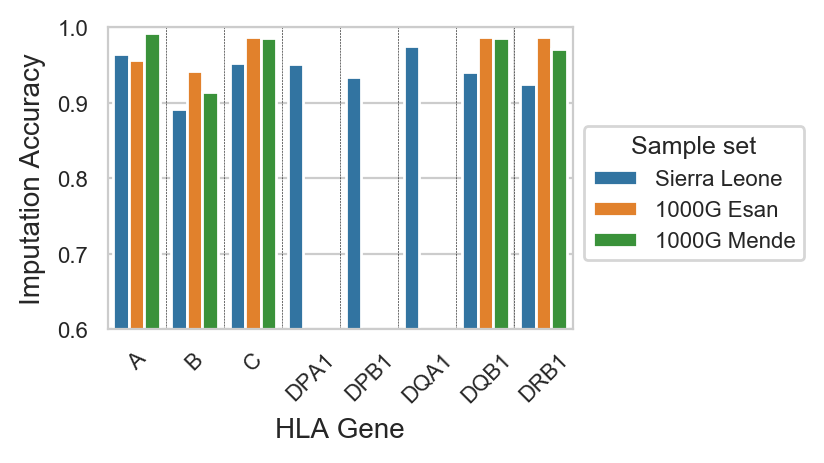

In [47]:
import seaborn as sns
sns.set_style("whitegrid")

(fig,ax) = plt.subplots(1,1, figsize=(3,2), dpi=200)
res_combined = pd.concat([res_kgh, res_kg_esn, res_kg_msl, pd.DataFrame(oob_accuracy_500K, columns=['OOB_Frac_Correct'])], axis=1).unstack().reset_index()
res_combined.columns = ['Group', 'Gene', 'Val']
res_combined['Cohort'] = res_combined['Group'].apply(lambda x: x.split('_')[0])
ind = res_combined['Group'].apply(lambda x: 'Frac' in x)
res_combined = res_combined.loc[ind, :]
order = res_combined['Gene'].unique()
res_combined = res_combined.loc[res_combined['Cohort'] != 'OOB', :]
res_combined['Cohort'] = res_combined['Cohort'].replace({'KGH':'Sierra Leone', 'ESN':'1000G Esan', 'MSL':'1000G Mende'})
ax.set_ylim([.6, 1])

ax = sns.barplot(x='Gene', y='Val', hue='Cohort', data=res_combined,
                 hue_order=['Sierra Leone', '1000G Esan', '1000G Mende'], 
                 order=order, ax=ax)

ax.set_ylabel('Imputation Accuracy', fontsize=10)
ax.set_xlabel('HLA Gene', fontsize=10)
ax.set_yticklabels(['0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=8)
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(order, fontsize=8, rotation=45)

ax.vlines(-.5, ymin=.6, ymax=1, linestyle='--', linewidth=.1)
ax.vlines(6.5, ymin=.6, ymax=1, linestyle='--', linewidth=.1)

for i in range(0, 8):
    if (i % 2) == 0:
        pass
        #ax.axvspan(i-.5, i+.5, facecolor='0.7', alpha=0.3)
    ax.vlines(i+.5, ymin=.6, ymax=1, linestyle='--', linewidth=.2)

    #else:
    #    #pass
    #    ax.axvspan(i-.5, i+.5, facecolor='0.6', alpha=0.1)        
ax.set_xlim(-.5, 7.5)

ax.legend(bbox_to_anchor=(1,.71), title='Sample set', fontsize=8,
         title_fontsize=9)

outfn = os.path.join(figuredir, 'HLA_Imputation_Accuracy.pdf')
fig.savefig(outfn, bbox_inches='tight')

outfn = os.path.join(figuredir, 'HLA_Imputation_Accuracy.png')
fig.savefig(outfn, bbox_inches='tight')

In [37]:
order

array(['A', 'B', 'C', 'DPA1', 'DPB1', 'DQA1', 'DQB1', 'DRB1'],
      dtype=object)

In [34]:
res_combined

,Group,Gene,Val,Cohort
0,KGH_Frac_Correct,A,0.965398,Sierra Leone
1,KGH_Frac_Correct,B,0.892361,Sierra Leone
2,KGH_Frac_Correct,C,0.953287,Sierra Leone
3,KGH_Frac_Correct,DPA1,0.951786,Sierra Leone
4,KGH_Frac_Correct,DPB1,0.934028,Sierra Leone
5,KGH_Frac_Correct,DQA1,0.975779,Sierra Leone
6,KGH_Frac_Correct,DQB1,0.940767,Sierra Leone
7,KGH_Frac_Correct,DRB1,0.925347,Sierra Leone
32,ESN_Frac_Correct,A,0.956250,1000G Esan
33,ESN_Frac_Correct,B,0.942308,1000G Esan


In [71]:
res_combined

,Group,Gene,Val,Cohort
0,KGH_Frac_Correct,A,0.965398,Sierra Leone
1,KGH_Frac_Correct,B,0.892361,Sierra Leone
2,KGH_Frac_Correct,C,0.953287,Sierra Leone
3,KGH_Frac_Correct,DPA1,0.951786,Sierra Leone
4,KGH_Frac_Correct,DPB1,0.934028,Sierra Leone
5,KGH_Frac_Correct,DQA1,0.975779,Sierra Leone
6,KGH_Frac_Correct,DQB1,0.940767,Sierra Leone
7,KGH_Frac_Correct,DRB1,0.925347,Sierra Leone
32,ESN_Frac_Correct,A,0.956250,1000G Esan
33,ESN_Frac_Correct,B,0.942308,1000G Esan
